In [1]:
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [2]:
!pip install mnist

In [3]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Setting up MNST, this should look familiar:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
train_data = train_images.reshape(train_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [7]:
conv_training_data = train_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [8]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

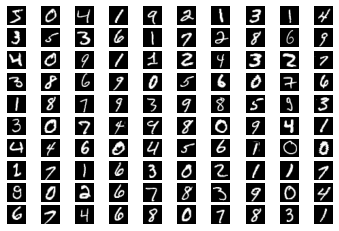

In [9]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(train_images[i], cmap='gray')

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.9599 - acc: 0.9211 - val_loss: 0.0548 - val_acc: 0.9837
Epoch 2/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.0597 - acc: 0.9807 - val_loss: 0.0529 - val_acc: 0.9860
Epoch 3/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.0390 - acc: 0.9874 - val_loss: 0.0449 - val_acc: 0.9877
Epoch 4/5
54000/54000 [==============================] - 5s 91us/step - loss: 0.0281 - acc: 0.9906 - val_loss: 0.0435 - val_acc: 0.9892
Epoch 5/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.0254 - acc: 0.9915 - val_loss: 0.0435 - val_acc: 0.9900


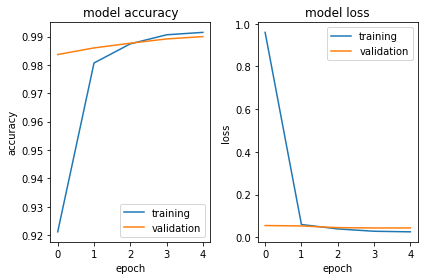

Test loss: 0.0421
Test accuracy: 0.988


In [10]:
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu')) # final fully connected layers
model.add(Dropout(0.2)) # 2% droping out 
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(conv_training_data, train_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

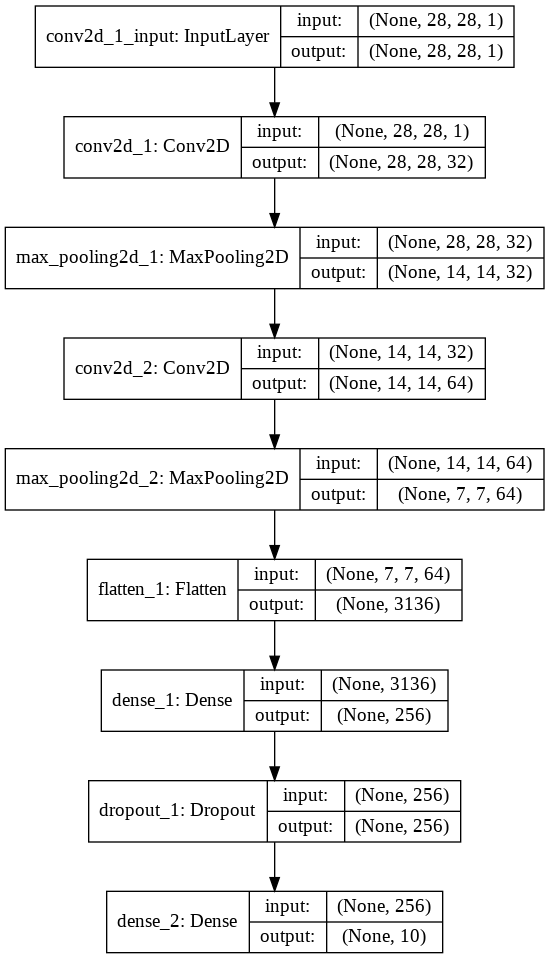

In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

6	3	5	5	6	

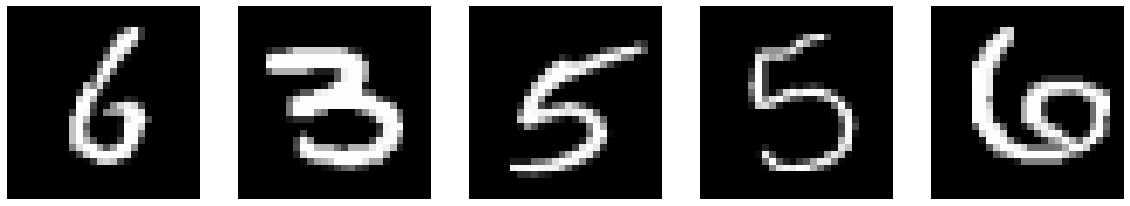

In [12]:
figure = plt.figure(figsize=(20,20))
for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(test_images[i+50,:,:,],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(test_images[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

In [13]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(conv_training_data[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

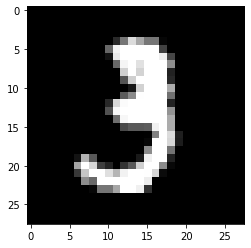

In [14]:
plt.imshow(conv_training_data[10][:,:,0],cmap='gray');

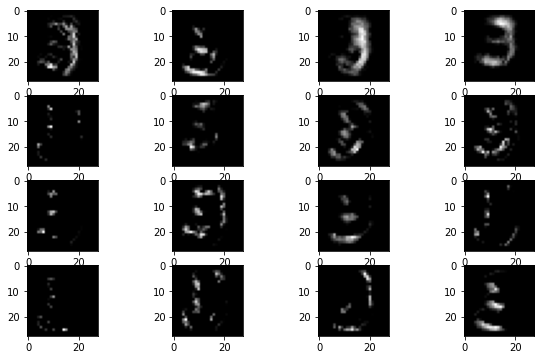

In [15]:
display_activation(activations, 4, 4, 0)  #first layer

### Desplaying above image after layer 2 .

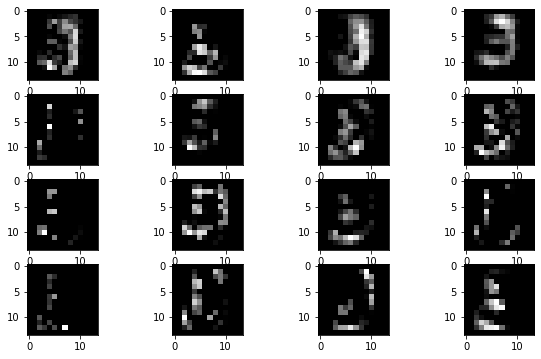

In [16]:
display_activation(activations, 4, 4, 1) #second layer

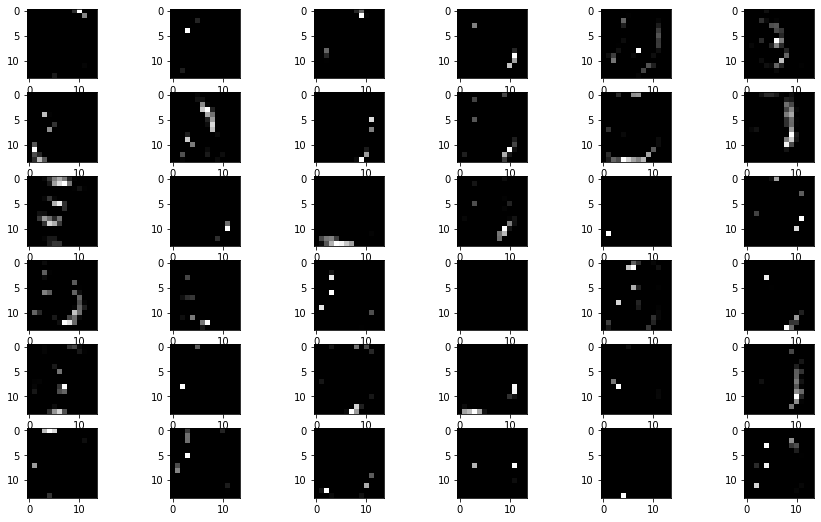

In [17]:
display_activation(activations, 6, 6, 2) #third layer

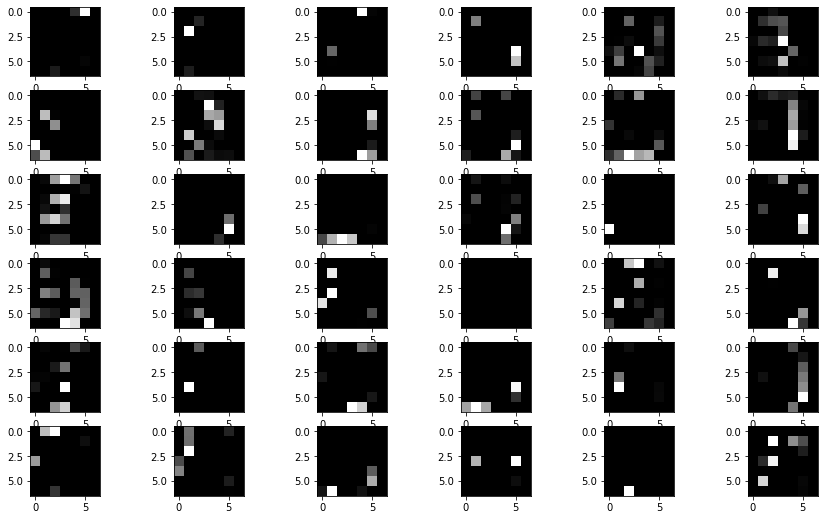

In [18]:
display_activation(activations, 6, 6, 3) #fouth layer

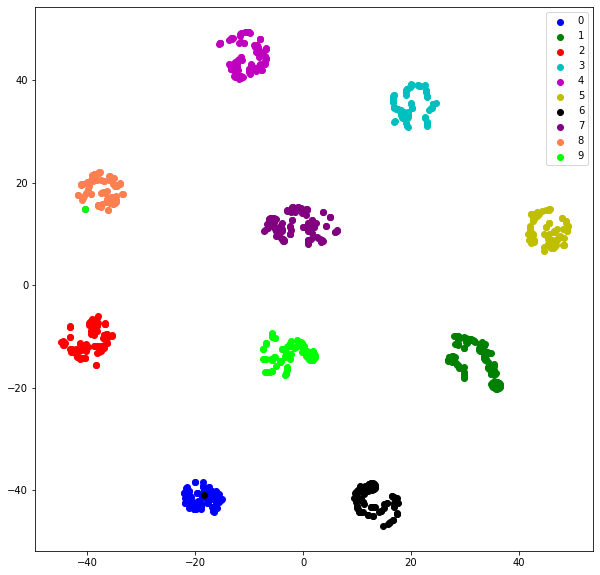

In [19]:
from sklearn.manifold import TSNE
hidden_features = model.predict(conv_training_data)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues
colors_map = np.argmax(train_labels, axis=1)

colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(10):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

Sparse Autoencoder

In [47]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers # for adding sparcity
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-6))(input_img)
encoded = Dense(128, activation='relu',activity_regularizer=regularizers.l1(10e-6))(encoded)
encoded = Dense(64, activation='relu',activity_regularizer=regularizers.l1(10e-6))(encoded)
encoded = Dense(32, activation='relu',activity_regularizer=regularizers.l1(10e-6))(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [48]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [49]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [50]:
autoencoder.compile(optimizer='adadelta', loss='categorical_crossentropy')

In [51]:
x_train = train_images.astype('float32') / 255.
x_test = test_images.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print ( x_test.shape)

(60000, 784)
(10000, 784)


In [52]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 30us/step - loss: 580.6677 - val_loss: 563.7366
Epoch 2/100
60000/60000 [==============================] - 2s 27us/step - loss: 551.3292 - val_loss: 554.1721
Epoch 3/100
60000/60000 [==============================] - 2s 27us/step - loss: 543.6029 - val_loss: 548.6597
Epoch 4/100
60000/60000 [==============================] - 2s 27us/step - loss: 538.7693 - val_loss: 544.1726
Epoch 5/100
60000/60000 [==============================] - 2s 27us/step - loss: 535.2231 - val_loss: 540.9878
Epoch 6/100
60000/60000 [==============================] - 2s 28us/step - loss: 532.6249 - val_loss: 539.2375
Epoch 7/100
60000/60000 [==============================] - 2s 27us/step - loss: 530.7140 - val_loss: 537.3858
Epoch 8/100
60000/60000 [==============================] - 2s 28us/step - loss: 529.2632 - val_loss: 536.3090
Epoch 9/100
60000/60000 [==============================] - 2s 28us/ste

In [53]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(test_data)
decoded_imgs = decoder.predict(encoded_imgs)

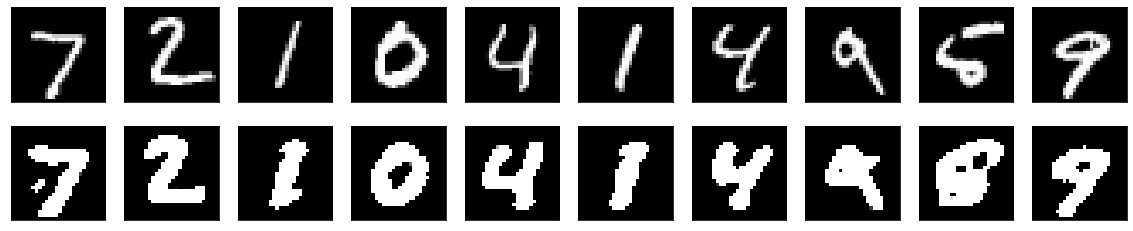

In [54]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()